In [14]:
# pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('image.png')
img

array([[[ 59,  95, 167],
        [ 84, 122, 189],
        [ 91, 132, 194],
        ...,
        [143, 181, 246],
        [144, 182, 247],
        [145, 183, 248]],

       [[ 80, 121, 186],
        [ 93, 134, 196],
        [ 89, 131, 191],
        ...,
        [143, 181, 246],
        [144, 182, 247],
        [145, 183, 248]],

       [[ 93, 135, 194],
        [ 89, 131, 190],
        [ 91, 133, 192],
        ...,
        [143, 181, 246],
        [144, 182, 247],
        [145, 183, 248]],

       ...,

       [[ 24,  48, 110],
        [ 24,  48, 110],
        [ 24,  48, 110],
        ...,
        [139, 182, 249],
        [139, 182, 249],
        [139, 182, 249]],

       [[ 23,  48, 112],
        [ 23,  48, 112],
        [ 23,  48, 112],
        ...,
        [139, 182, 249],
        [139, 182, 249],
        [139, 182, 249]],

       [[ 22,  49, 113],
        [ 22,  49, 113],
        [ 22,  49, 113],
        ...,
        [138, 181, 248],
        [138, 181, 248],
        [138, 181, 248]]

In [3]:
cv2.imshow('Coffee Package',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

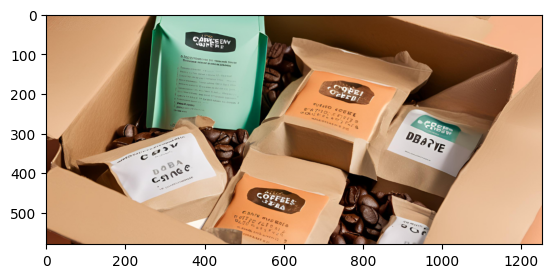

In [4]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

In [5]:
cv2.imwrite('bag.png',img)

True

In [6]:
cap = cv2.VideoCapture(0) #or give it the path of the video
while(1):
    ret, frame= cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('orignal', frame)
        cv2.imshow('gray', gray)
        
        if cv2.waitKey(10) & 0XFF == ord('q'):  #to close the windowns when press on key (q)
            break
cap.release()
cv2.destroyAllWindows()

# Image Masking and Color Tracking


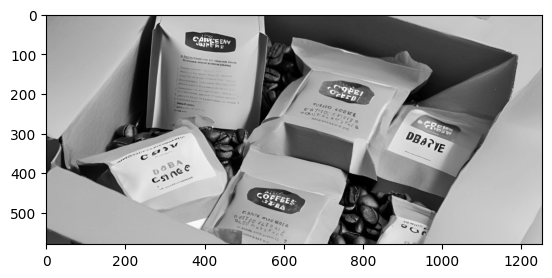

In [7]:
img = cv2.imread('image.png',0)  # 0 gray - 1 color

plt.imshow(img, 'gray')

In [8]:
img.shape

(580, 1253)

In [9]:
np.zeros_like(img)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
np.zeros_like(img).shape

(580, 1253)

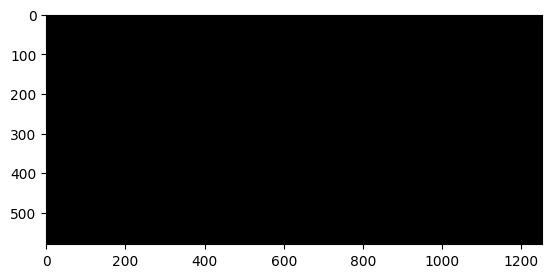

In [11]:
plt.imshow(np.zeros_like(img), 'gray')

# Addition-Sub two images

In [12]:
a = np.uint8([150])
b = np.uint8([200])
# not true result (255)
cv2.add(a,b)

array([[350.],
       [  0.],
       [  0.],
       [  0.]])

In [13]:
# not true result (0)
cv2.subtract(a, b)

array([[-50.],
       [  0.],
       [  0.],
       [  0.]])

# Color tracking

In [18]:
cap = cv2.VideoCapture(0)
while(1):
    ret, frame = cap.read() # ret is boolean
    if ret:
        
        # first we need to convert img from BGR to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # define range of blue color in HSV
        lower_limit = np.array([100,100,100])
        upper_limit = np.array([130,255,255])
        
        # Threshold the HSV image to get only blue colors
        mask = cv2.inRange(hsv, lower_limit, upper_limit) 
        
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(frame,frame,mask=mask)
        
        cv2.imshow('Orginal', frame)
        cv2.imshow('Mask', mask)
        cv2.imshow('Result',res)
        if cv2.waitKey(10) & 0XFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

# Image Resizing Techniques

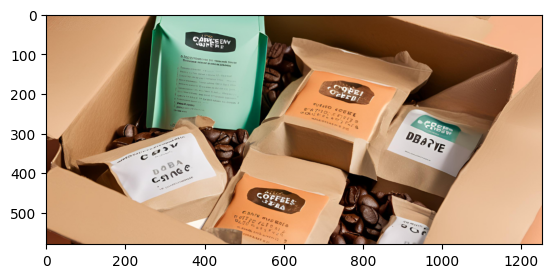

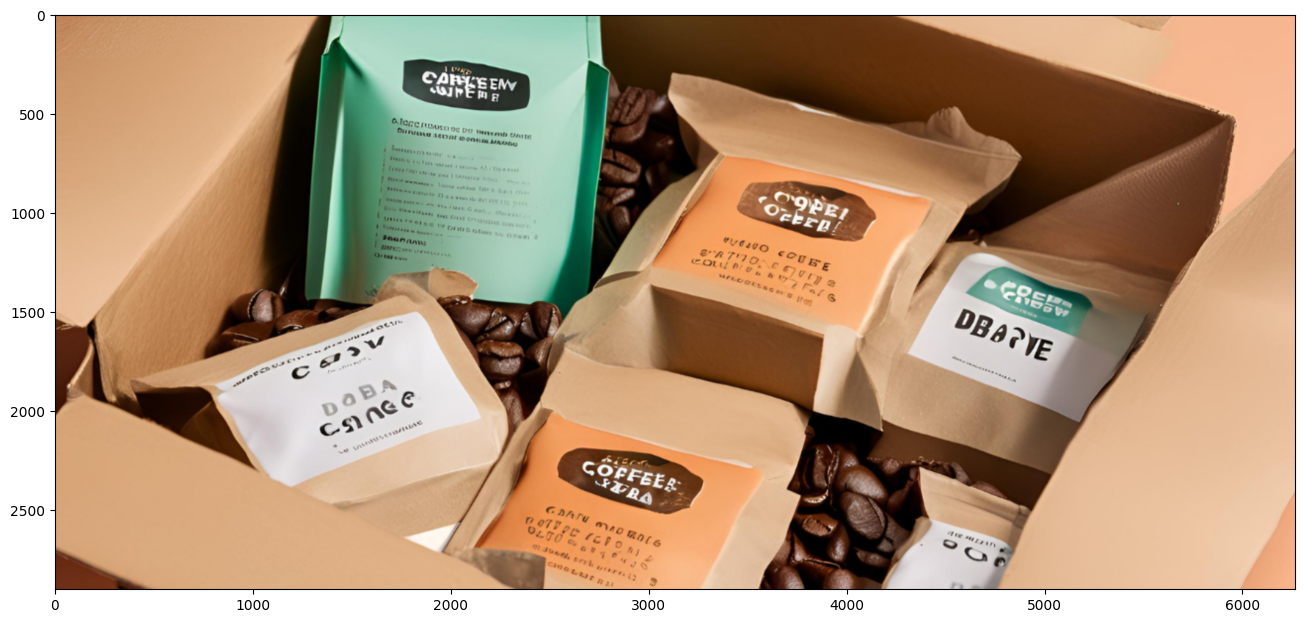

(2900, 6265, 3)


In [14]:
img = cv2.imread('image.png')

# (height, width, channel)
h = img.shape[0]
w = img.shape[1]

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resized = cv2.resize(rgb_img, (w*5,h*5), interpolation = cv2.INTER_LINEAR)

plt.imshow(rgb_img)
plt.show()
plt.figure(figsize=(16,10))
plt.imshow(resized)
plt.show()

print(resized.shape)


# Geometric Transformation

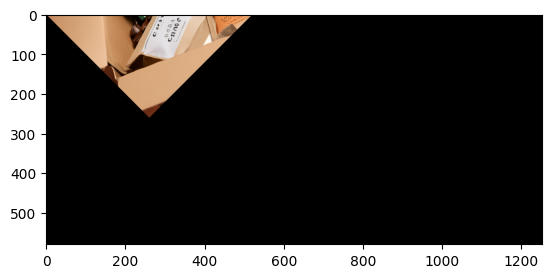

In [21]:
img = cv2.imread('image.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# (height, width, channel)
h = img.shape[0]
w = img.shape[1]

# #Translation to right
# M= np.float32([[1,0,500],
#                [0,1,0]])

# #Translation to up
# M= np.float32([[1,0,0],
#                [0,1,200]])

#Rotation
M= np.float32([[0.45,0.45,0],
               [-0.45,0.45,0]])


dst = cv2.warpAffine(img, M, (w,h))
plt.imshow(dst)

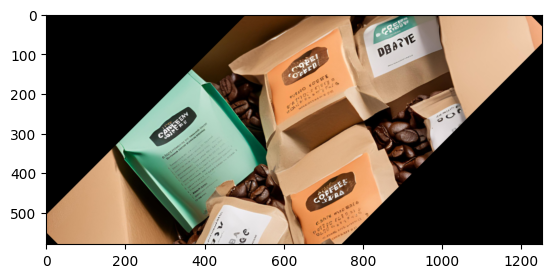

In [26]:
#Rotation around center (define center)
# M= cv2.getRotationMatrix2D((w/2,h/2),90,1)

M= cv2.getRotationMatrix2D((w/2,h/2),45,1)
dst = cv2.warpAffine(img, M, (w,h))
plt.imshow(dst)

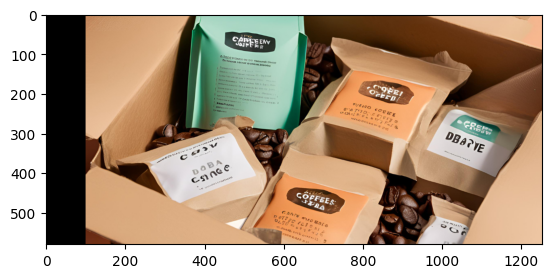

In [30]:
pts1 = np.float32([[10,100],[200,50],[100,250]])
pts2 = np.float32([[110,100],[300,50],[200,250]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (w,h))
plt.imshow(dst)

# Image Filtering and noise reduction

(<Axes: title={'center': 'blurred by conv'}>,
 Text(0.5, 1.0, 'blurred by conv'))

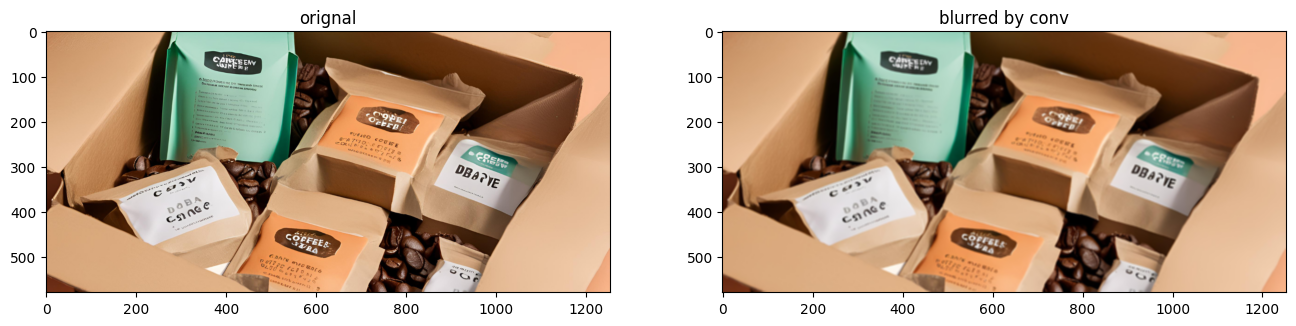

In [37]:
img = cv2.imread('image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img),plt.title('orignal')
plt.subplot(122),plt.imshow(dst),plt.title('blurred by conv')

(<Axes: title={'center': 'blurred by conv'}>,
 Text(0.5, 1.0, 'blurred by conv'))

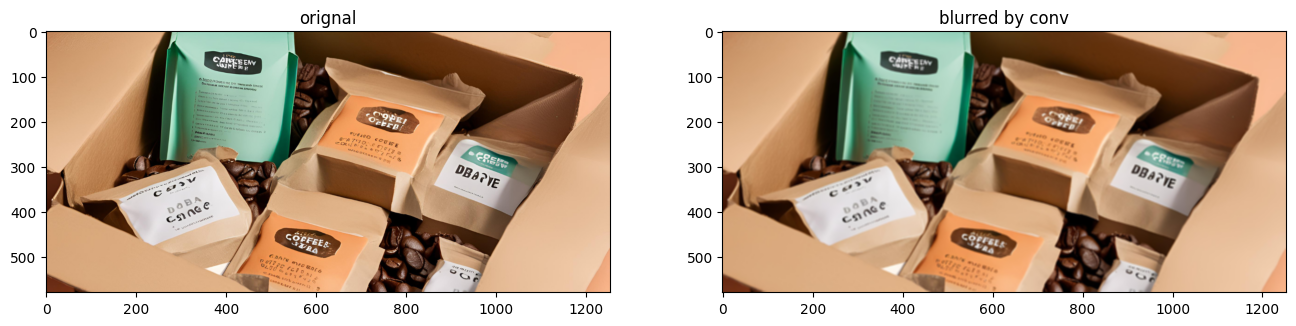

In [38]:
dst = cv2.blur(img,(5,5))

plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img),plt.title('orignal')
plt.subplot(122),plt.imshow(dst),plt.title('box filtering')

(<Axes: title={'center': 'GaussianBlur filtering'}>,
 Text(0.5, 1.0, 'GaussianBlur filtering'))

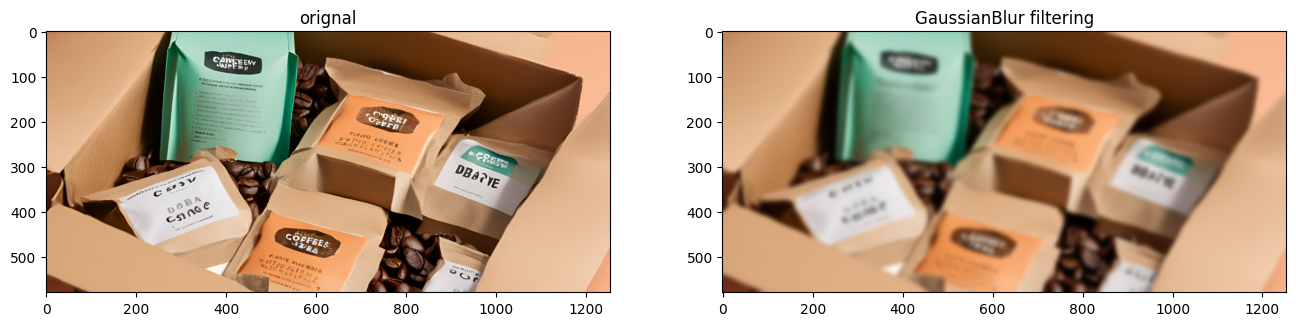

In [39]:
dst = cv2.GaussianBlur(img,(29,29), 0)

plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img),plt.title('orignal')
plt.subplot(122),plt.imshow(dst),plt.title('GaussianBlur filtering')

(<Axes: title={'center': 'madianBlur filtering'}>,
 Text(0.5, 1.0, 'madianBlur filtering'))

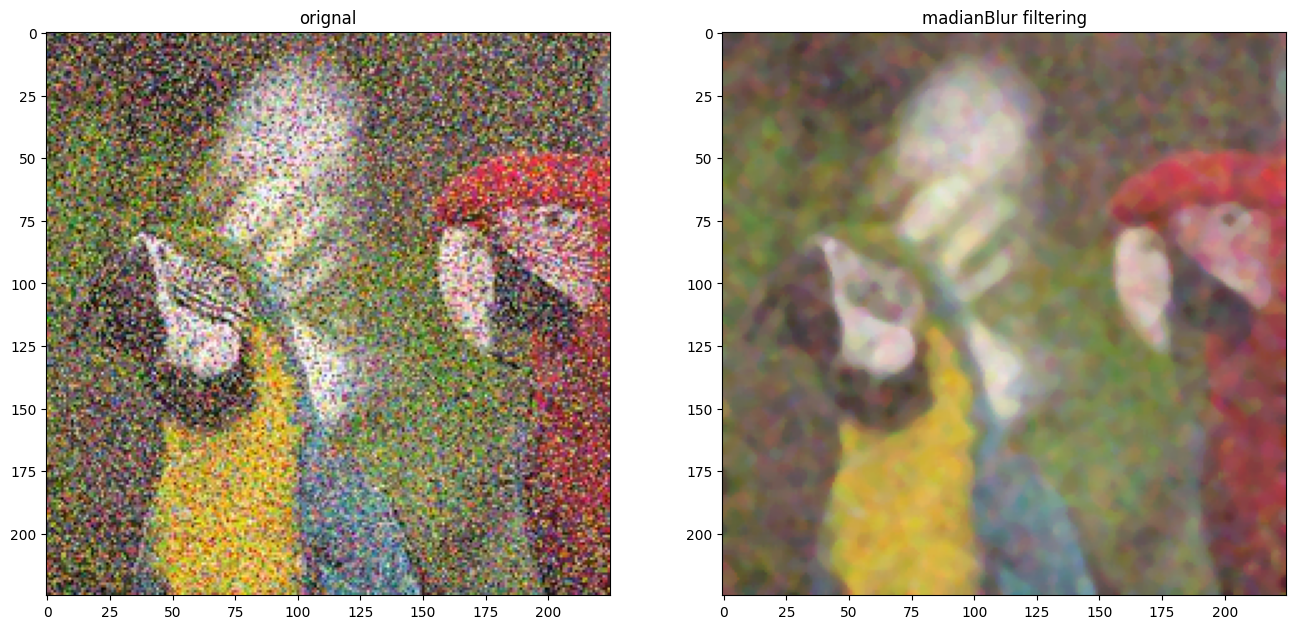

In [45]:
img = cv2.imread('images.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dst =cv2.medianBlur(img, 5)
dst =cv2.medianBlur(dst, 5)

plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img),plt.title('orignal')
plt.subplot(122),plt.imshow(dst),plt.title('madianBlur filtering')


# Image Thresholding


(<Axes: title={'center': 'binary inverse'}>,
 Text(0.5, 1.0, 'binary inverse'))

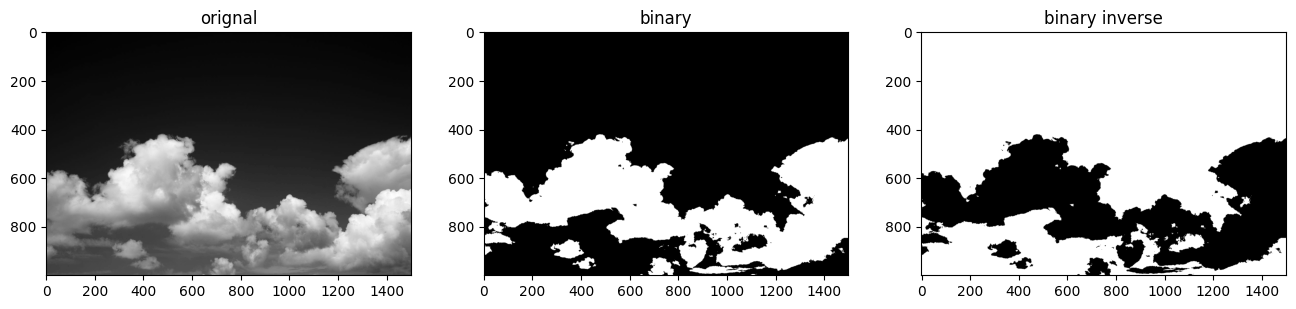

In [7]:
img = cv2.imread('clould2.jpg', 0) # 0 mean gray scale
# 127 the threshold value - 255 is the upper limit
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)


plt.figure(figsize=(16,12))
plt.subplot(131), plt.imshow(img, 'gray'),plt.title('orignal')
plt.subplot(132), plt.imshow(thresh, 'gray'),plt.title('binary')
plt.subplot(133), plt.imshow(thresh2, 'gray'),plt.title('binary inverse')

(<Axes: title={'center': 'Gaussian'}>,
 Text(0.5, 1.0, 'Gaussian'))

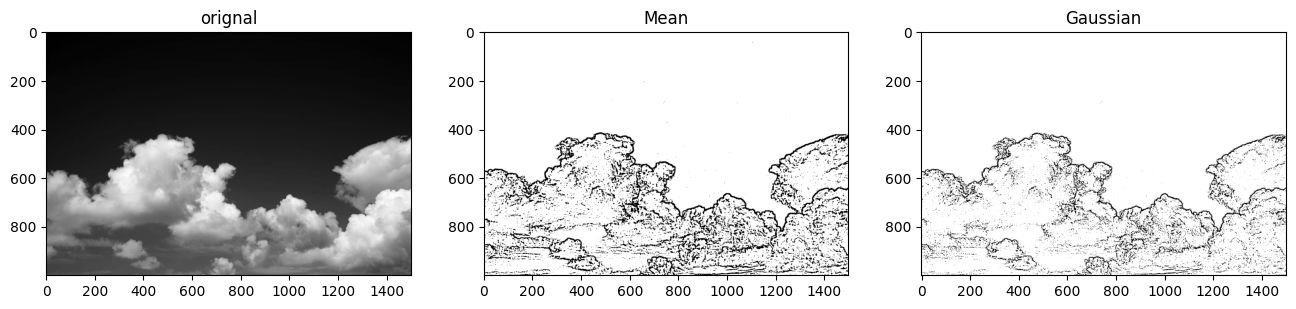

In [8]:
# 11 is th no. of pexels we sum it - 2 is constant for subtract
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


plt.figure(figsize=(16,12))
plt.subplot(131), plt.imshow(img, 'gray'),plt.title('orignal')
plt.subplot(132), plt.imshow(thresh, 'gray'),plt.title('Mean')
plt.subplot(133), plt.imshow(thresh2, 'gray'),plt.title('Gaussian')

(<Axes: title={'center': 'OTSU'}>,
 Text(0.5, 1.0, 'OTSU'))

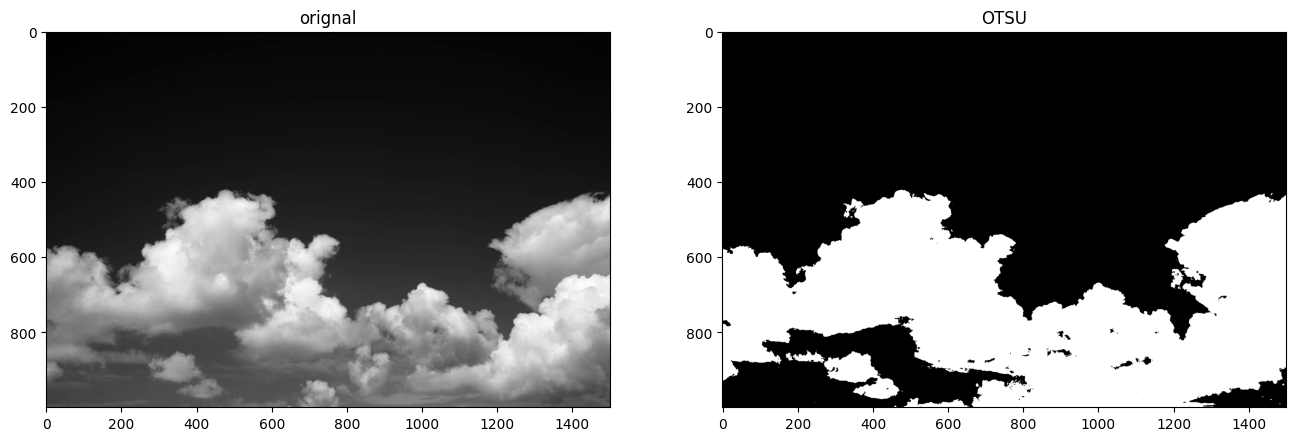

In [11]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(16,12))
plt.subplot(121), plt.imshow(img, 'gray'),plt.title('orignal')
plt.subplot(122), plt.imshow(thresh, 'gray'),plt.title('OTSU')


# Morphological Transformation


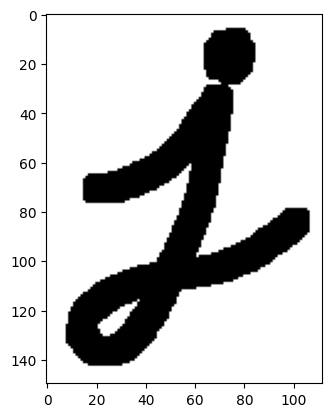

In [18]:
img = cv2.imread('img.png', 0)
_,thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh, 'gray')

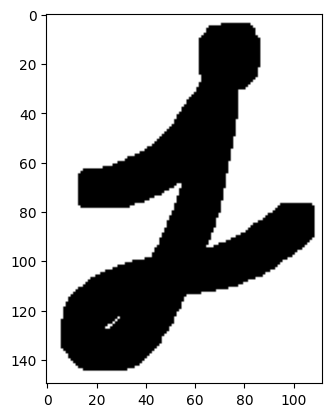

In [21]:
kernel=np.ones((5,5))
erosion = cv2.erode(thresh, kernel, iterations=1)
plt.imshow(erosion, 'gray')

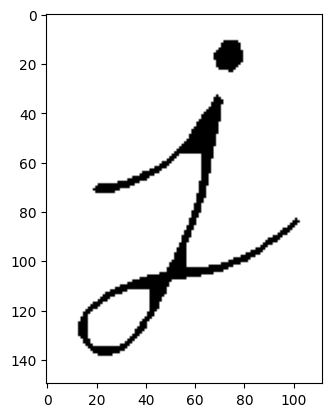

In [23]:
kernel=np.ones((5,5))
dilation = cv2.dilate(thresh, kernel, iterations=2)
plt.imshow(dilation, 'gray')

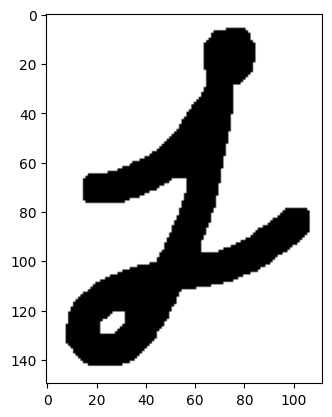

In [24]:
kernel=np.ones((5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel)
plt.imshow(opening, 'gray')

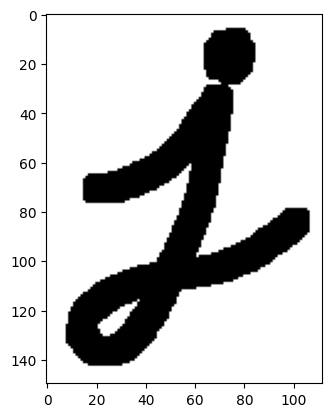

In [26]:
kernel=np.ones((5,5))
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,kernel)
plt.imshow(closing, 'gray')

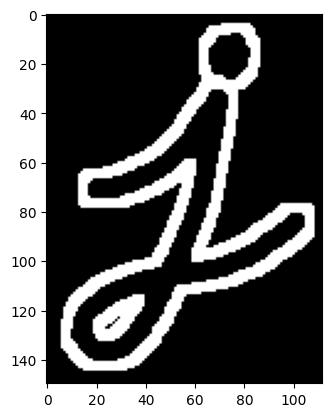

In [27]:
gradient  = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT,kernel)
plt.imshow(gradient, 'gray')

# Edge Detection

(<Axes: title={'center': 'sobel_d'}>,
 Text(0.5, 1.0, 'sobel_d'))

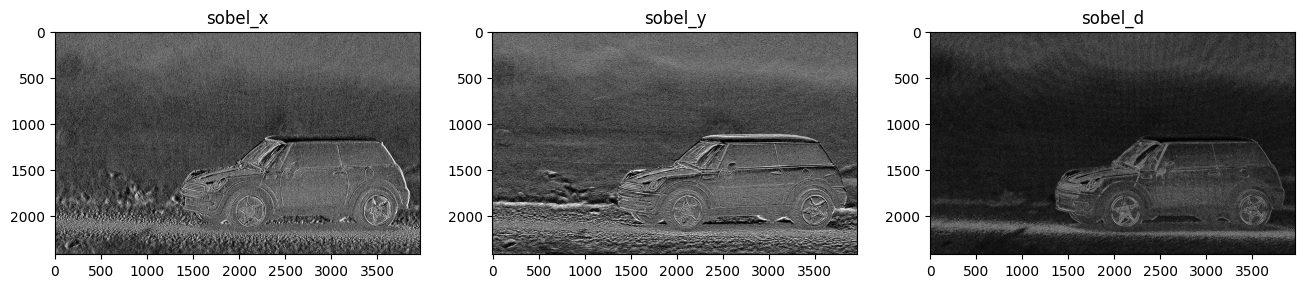

In [29]:
img = cv2.imread('car.jpg',0)

# Sobel Operation
sobel_x = cv2.Sobel(img, -1, 1, 0, ksize=5) #x
sobel_y = cv2.Sobel(img, -1, 0, 1, ksize=5) #y
sobel_d = cv2.Sobel(img, -1, 1, 1, ksize=5) #x+y = d

plt.figure(figsize=(16,12))
plt.subplot(131),plt.imshow(sobel_x, 'gray'),plt.title('sobel_x')
plt.subplot(132),plt.imshow(sobel_y, 'gray'),plt.title('sobel_y')
plt.subplot(133),plt.imshow(sobel_d, 'gray'),plt.title('sobel_d')

(<Axes: title={'center': 'scharr_y'}>,
 Text(0.5, 1.0, 'scharr_y'))

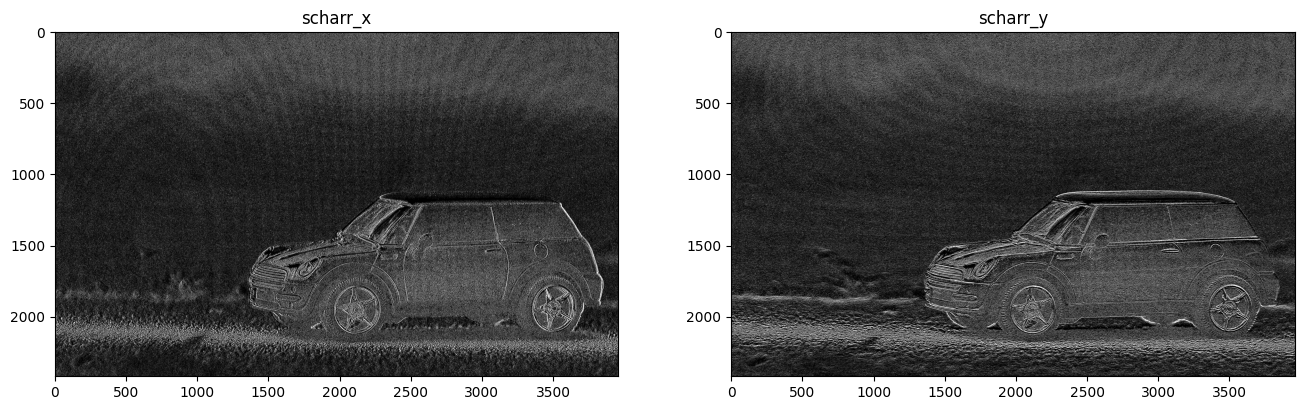

In [31]:
# Scharr Operation
scharr_x = cv2.Scharr(img, -1, 1, 0, 5) #x
scharr_y = cv2.Scharr(img, -1, 0, 1, 5) #y

plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(scharr_x, 'gray'),plt.title('scharr_x')
plt.subplot(122),plt.imshow(scharr_y, 'gray'),plt.title('scharr_y')


Text(0.5, 1.0, 'Laplacian')

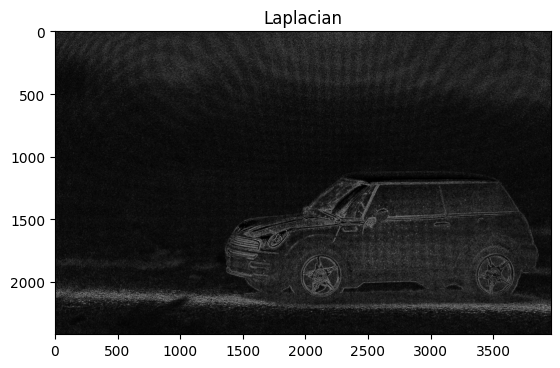

In [35]:
# Laplacian
lap = cv2.Laplacian(img, -1, ksize=3) 

plt.imshow(lap, 'gray')
plt.title('Laplacian')


Text(0.5, 1.0, 'Canny')

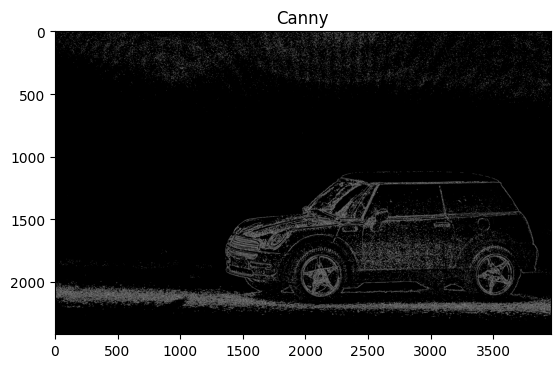

In [36]:
# Canny
canny = cv2.Canny(img, 150, 200) # 200 > Edge , <150 no Edge, between 200:150 ?

plt.imshow(canny, 'gray')
plt.title('Canny')


# Images Features

(<Axes: >, <matplotlib.image.AxesImage at 0x1eef469e150>)

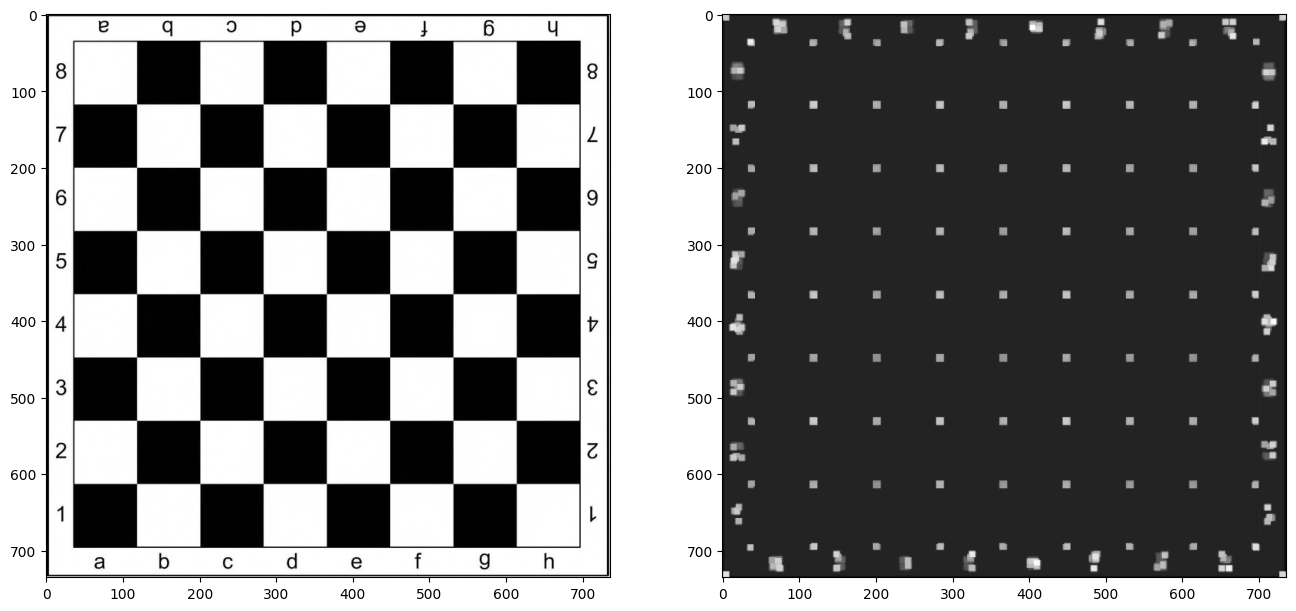

In [7]:
img = cv2.imread('chess.jpg', 0)


corner = cv2.cornerHarris(img, 4, 3, 0.04) # img, block size(sobel), kernel, self difference)

corner= cv2.dilate(corner, None, iterations=3) 

plt.figure(figsize=(16,10))
plt.subplot(121),plt.imshow(img,'gray')
plt.subplot(122),plt.imshow(corner, 'gray')

# Sift Approach and feature matching

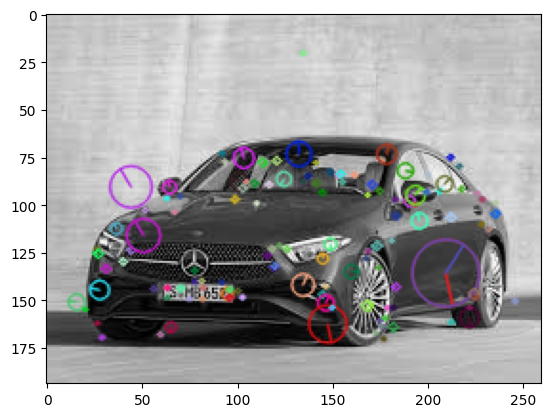

In [20]:
img = cv2.imread('first.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create(edgeThreshold=5)
kp = sift.detect(gray, None)
img = cv2.drawKeypoints(gray, kp,img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img)

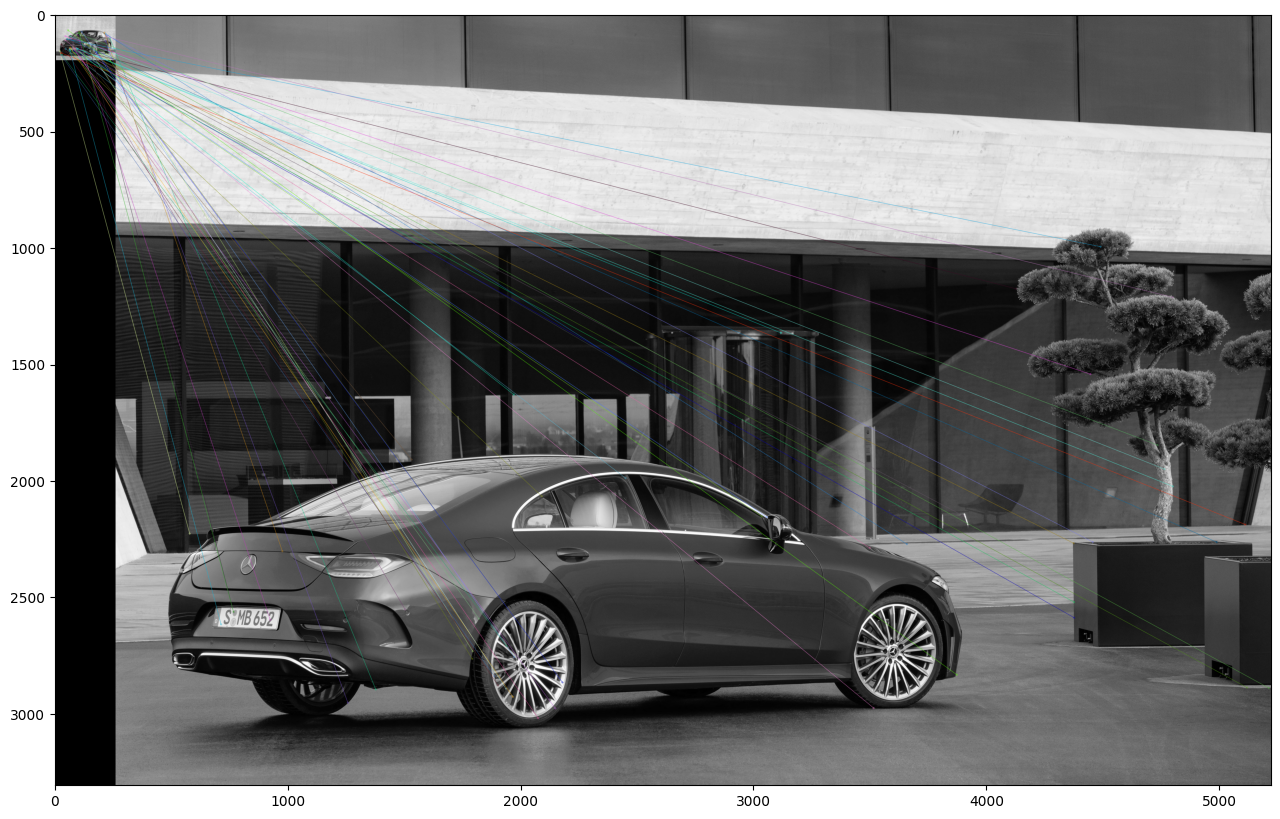

In [24]:
img1 = cv2.imread('first.jpg',0)
img2 = cv2.imread('second.jpg',0)

sift = cv2.SIFT_create()
kp1, dest1 = sift.detectAndCompute(img1, None)
kp2, dest2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.match(dest1,dest2)
matches = sorted(matches, key=lambda x: x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,10))
plt.imshow(img3)
